In [8]:
import fiftyone as fo
dataset = fo.load_dataset("pipeline_data")

In [11]:
results_1 = dataset.evaluate_detections(
    "sahi_predictions_v2_1280x1280",
    gt_field="ground_truth",
    eval_key="comp_1",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...
 100% |█████████████| 11369/11369 [3.5m elapsed, 0s remaining, 62.4 samples/s]      
Performing IoU sweep...
 100% |█████████████| 11369/11369 [2.3m elapsed, 0s remaining, 69.6 samples/s]       


In [13]:
samples = dataset.clone()

In [14]:
counts = samples.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_1.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.22      0.48      0.30     40885
      ELECTRIC_POLES       0.26      0.33      0.29     13952
PERMENANT_STRUCTURES       0.17      0.34      0.23     12029
TEMPORARY_STRUCTURES       0.12      0.29      0.17      4837
               PYLON       0.20      0.31      0.25      3173
                WELL       0.13      0.29      0.18      3033
               SOLAR       0.33      0.31      0.32       373
              MARKER       0.00      0.00      0.00       236
                 TLP       0.06      0.02      0.03       123
               ROADS       0.00      0.00      0.00        53

           micro avg       0.21      0.40      0.27     78694
           macro avg       0.15      0.24      0.18     78694
        weighted avg       0.21      0.40      0.27     78694



In [19]:
results_3 = dataset.evaluate_detections(
    "merged_nms",
    gt_field="sahi_predictions_v2_1280x1280",
    eval_key="comp_3",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...
 100% |█████████████| 11369/11369 [5.9m elapsed, 0s remaining, 51.7 samples/s]       
Performing IoU sweep...
 100% |█████████████| 11369/11369 [4.4m elapsed, 0s remaining, 56.3 samples/s]       


In [20]:
counts = samples.count_values("sahi_predictions_v2_1280x1280.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_3.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.81      0.91      0.86     88957
PERMENANT_STRUCTURES       0.52      0.91      0.66     23908
      ELECTRIC_POLES       0.76      0.99      0.86     17748
TEMPORARY_STRUCTURES       0.78      0.98      0.87     11811
                WELL       0.94      0.99      0.96      6536
               PYLON       0.49      0.94      0.64      4747
               SOLAR       0.21      0.79      0.34       351
                 TLP       0.86      1.00      0.93        31

           micro avg       0.73      0.93      0.82    154089
           macro avg       0.67      0.94      0.76    154089
        weighted avg       0.75      0.93      0.83    154089



In [15]:
results_2 = dataset.evaluate_detections(
    "merged_nms",
    gt_field="ground_truth",
    eval_key="comp_2",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...
 100% |█████████████| 11369/11369 [4.2m elapsed, 0s remaining, 53.3 samples/s]       
Performing IoU sweep...
 100% |█████████████| 11369/11369 [2.6m elapsed, 0s remaining, 66.7 samples/s]       


In [16]:
counts = samples.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

results_2.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.18      0.44      0.25     40885
      ELECTRIC_POLES       0.21      0.35      0.26     13952
PERMENANT_STRUCTURES       0.09      0.32      0.15     12029
TEMPORARY_STRUCTURES       0.09      0.29      0.14      4837
               PYLON       0.10      0.30      0.16      3173
                WELL       0.13      0.29      0.18      3033
               SOLAR       0.08      0.28      0.12       373
              MARKER       0.00      0.00      0.00       236
                 TLP       0.08      0.02      0.04       123
               ROADS       0.00      0.00      0.00        53

           micro avg       0.15      0.38      0.22     78694
           macro avg       0.10      0.23      0.13     78694
        weighted avg       0.16      0.38      0.22     78694



In [3]:
import fiftyone.core.utils as fou

for sample in dataset:
    sample["file_hash"] = fou.compute_filehash(sample.filepath)
    sample.save()

print(dataset)

Name:        pipeline_data
Media type:  image
Num samples: 11369
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    file_hash:    fiftyone.core.fields.IntField


In [29]:
sample = dataset.first()
print(sample)

<Sample: {
    'id': '65af5659f8aba9eef79b30c0',
    'media_type': 'image',
    'filepath': '/home/naveen/workspace/voxel/Pipline_workspace/data/SURENDAR/20230920/images/DSC01149.JPG',
    'tags': [],
    'metadata': None,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '65af5659f8aba9eef79b5d29',
                'attributes': {},
                'tags': [],
                'label': 'PERMENANT_STRUCTURES',
                'bounding_box': [0.581, 0.51725, 0.05433333333333333, 0.08525],
                'mask': None,
                'confidence': 1.0,
                'index': None,
            }>,
            <Detection: {
                'id': '65af5659f8aba9eef79b5d2a',
                'attributes': {},
                'tags': [],
                'label': 'PERMENANT_STRUCTURES',
                'bounding_box': [
                    0.6736666666666666,
                    0.45975,
                    0.035666666666666666,
       

In [ ]:
session = fo.launch_app(dataset)

In [11]:
print(dataset.first)

<bound method Dataset.first of Name:        pipeline_data
Media type:  image
Num samples: 11369
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)>

Could not connect session, trying again in 10 seconds



In [4]:
import fiftyone.utils.iou as fiou

In [5]:
fiou.compute_max_ious(dataset, "ground_truth", iou_attr = "max_iou")
print("Iou range : (%f , %f)" %dataset.bounds("ground_truth.detections.max_iou"))

 100% |█████████████| 11369/11369 [16.8s elapsed, 0s remaining, 502.0 samples/s]      
Iou range : (0.000000 , 0.958692)


In [38]:
dup_ids = fiou.find_duplicates(
    dataset, "ground_truth", iou_thresh=0.7, classwise=True
)

print("Found %d duplicates" % len(dup_ids))

                                                                                      
Could not connect session, trying again in 10 seconds

 100% |█████████████| 11370/11370 [10.2s elapsed, 0s remaining, 741.6 samples/s]      
Found 0 duplicates


In [39]:
dataset.select_labels(ids=dup_ids).tag_labels("duplicate")


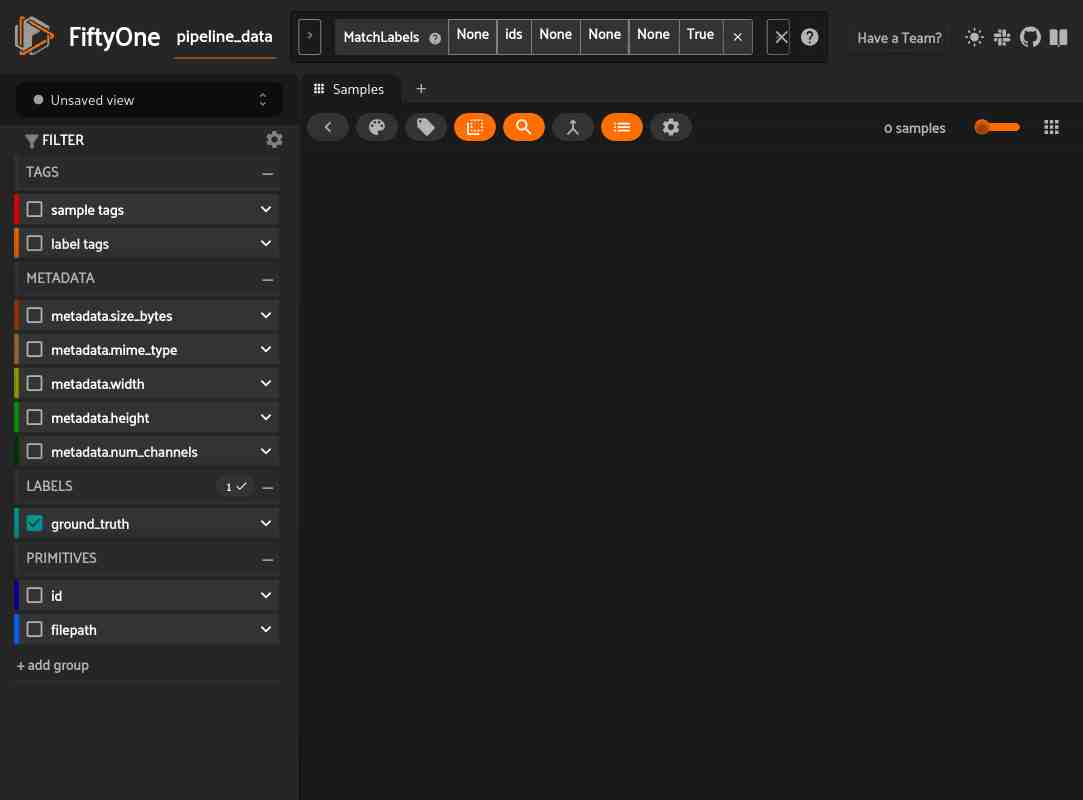

In [40]:
session.view = dataset.match_labels(ids=dup_ids)

In [49]:
import fiftyone.brain as fob
import fiftyone.zoo as foz
model = foz.load_zoo_model("resnet50-imagenet-torch")

# Verify that the model exposes embeddings
print(model.has_embeddings)
# True

# Compute embeddings for each image
embeddings = dataset.compute_embeddings(model)
print(embeddings.shape)
# 10000 x 2048

# Compute 2D representation using pre-computed embeddings
results = fob.compute_visualization(
    dataset,              
    embeddings=embeddings,
    num_dims=2,                                                                
    brain_key="image_embeddings",
    verbose=True,
    seed=51,
)

True
                                                                                
Could not connect session, trying again in 10 seconds

                                                                                 
Could not connect session, trying again in 10 seconds

                                                                                 
Could not connect session, trying again in 10 seconds

                                                                                 
Could not connect session, trying again in 10 seconds

                                                                                 
Could not connect session, trying again in 10 seconds

                                                                                 
Could not connect session, trying again in 10 seconds

                                                                                 
Could not connect session, trying again in 10 seconds

                                     

KeyboardInterrupt: 


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 s

In [18]:
print(type(results))
print(results.points.shape)

NameError: name 'results' is not defined


Could not connect session, trying again in 10 seconds



In [67]:
session = fo.launch_app(dataset)
# Plot embeddings colored by ground truth
plot = results.visualize()
plot.show(height=720)

# Attach plot to session
session.plots.attach(plot)

FigureWidget({
    'data': [{'customdata': array(['65a8b1cb2943d4d6ce6b7edb', '65a8b1cb2943d4d6ce6b7edc',
                                   '65a8b1cb2943d4d6ce6b7edd', ..., '65a8b1cc2943d4d6ce6bab41',
                                   '65a8b1cc2943d4d6ce6bab42', '65a8b1cc2943d4d6ce6bab43'], dtype=object),
              'hovertemplate': 'x, y = %{x:.3f}, %{y:.3f}<br>ID: %{customdata}<extra></extra>',
              'mode': 'markers',
              'type': 'scattergl',
              'uid': '464c5116-3e54-4651-851e-c57fc9839cba',
              'x': array([ 9.513428,  9.464165,  9.103345, ..., 11.21769 ,  1.944872,  9.420924],
                         dtype=float32),
              'y': array([ 0.7620895 ,  1.7199584 , -0.34591407, ..., -1.7126905 , -0.5811478 ,
                          -1.5918766 ], dtype=float32)}],
    'layout': {'height': 720, 'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30}, 'template': '...'}
})

In [6]:
import cv2
import numpy as np
                          
import fiftyone.brain as fob

results_1 = fob.compute_visualization(
   dataset, brain_key="pipeline_emb"
)

Computing embeddings...
 100% |█████████████| 11369/11369 [1.5h elapsed, 0s remaining, 2.0 samples/s]      
Generating visualization...


2024-11-11 13:25:23.631928: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 13:25:24.051630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 13:25:24.487629: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


UMAP( verbose=True)
Mon Nov 11 13:25:25 2024 Construct fuzzy simplicial set
Mon Nov 11 13:25:25 2024 Finding Nearest Neighbors
Mon Nov 11 13:25:25 2024 Building RP forest with 10 trees
Mon Nov 11 13:25:26 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Mon Nov 11 13:25:32 2024 Finished Nearest Neighbor Search
Mon Nov 11 13:25:33 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Nov 11 13:25:37 2024 Finished embedding


In [7]:
plot_1 = results_1.visualize()
plot_1.show(height=720)


FigureWidget({
    'data': [{'customdata': array(['65af7d9ef8aba9eef79c9116', '65af7d9ef8aba9eef79c9117',
                                   '65af7d9ef8aba9eef79c9118', ..., '65af7d9ef8aba9eef79cbd7d',
                                   '65af7d9ef8aba9eef79cbd7e', '65af7d9ef8aba9eef79cbd7f'], dtype=object),
              'hovertemplate': 'x, y = %{x:.3f}, %{y:.3f}<br>ID: %{customdata}<extra></extra>',
              'mode': 'markers',
              'type': 'scattergl',
              'uid': 'a9a2eb8a-b83f-487a-acf9-3aa0739c5e73',
              'x': array([-2.3475103, -2.0853176, -3.051669 , ..., -4.5700474, -0.3813533,
                          -3.3116727], dtype=float32),
              'y': array([3.2539272, 2.6066809, 4.922405 , ..., 5.9503813, 5.1298466, 5.7397046],
                         dtype=float32)}],
    'layout': {'height': 720, 'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30}, 'template': '...'}
})

In [4]:
import fiftyone as fo

export_dir = "test_data"
label_field = "ground_truth"  # for example
samples = dataset.take(100)
# # The splits to export
# splits = ["train", "", "val"]

# All splits must use the same classes list
classes = ["ELECTRIC_POLES", "TREES", "TEMPORARY_STRUCTURES", "PERMENANT_STRUCTURES","SOLAR", "PYLON", "WELL", "TLP"]

# The dataset or view to export
# We assume the dataset uses sample tags to encode the splits to export
# dataset_or_view = fo.Dataset(...)

# Export the splits

    # split_view = dataset_or_view.match_tags(split)
samples.export(
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
        # split=split,
    classes=classes,
)

 100% |█████████████████| 100/100 [1.4s elapsed, 0s remaining, 74.9 samples/s]         


In [41]:
dataset.add_sample_field("created_date",fo.DateField, description="Storing date of creation")


Could not connect session, trying again in 10 seconds



In [42]:
import json
from datetime import datetime


with open('./resulting_data.json') as f:
    data = json.load(f)
    

for sample in dataset:
    for folder in data['folders']:
        fp = folder['changed_path']
        idx = str(sample.filepath).find(fp)
        if not idx == -1:
            date_object = datetime.strptime(folder['date'], '%Y-%m-%d_%H-%M-%S')
            sample.set_field("created_date",date_object)
    sample.save()


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds




Could not connect session, trying again in 10 seconds




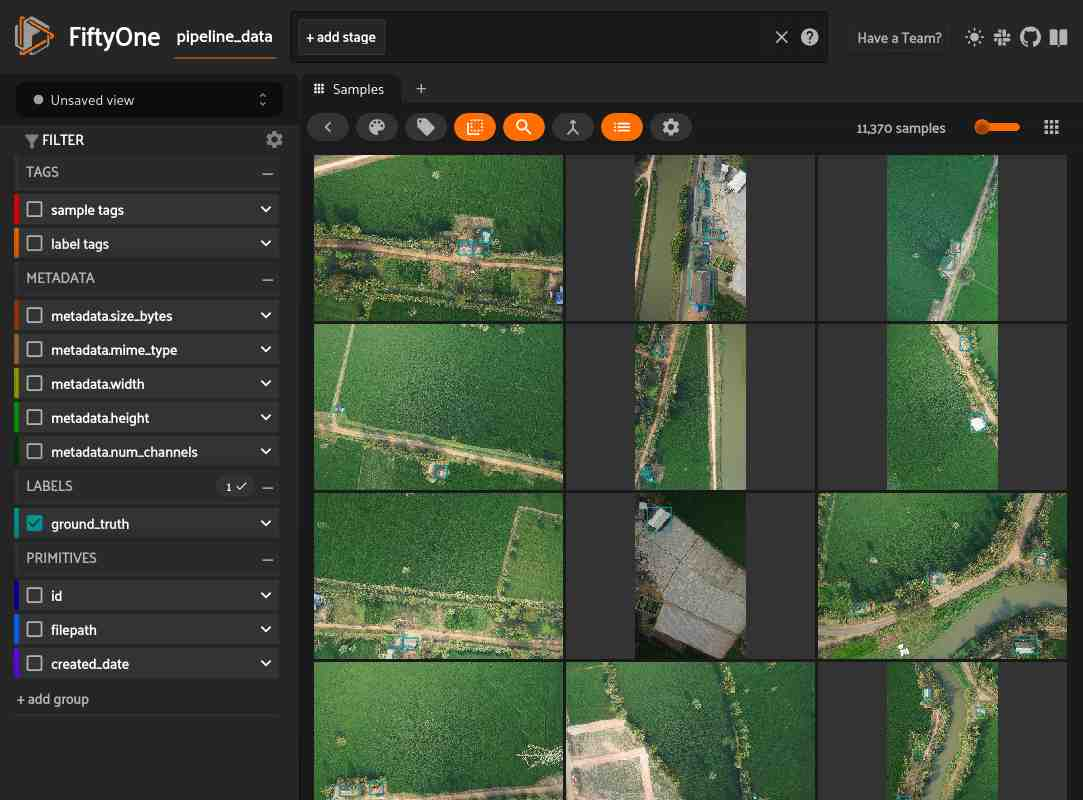


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds



In [43]:
session = fo.launch_app(dataset)

In [44]:
for sample in dataset:
    print(sample)
    break

<Sample: {
    'id': '65af7d9ef8aba9eef79c9116',
    'media_type': 'image',
    'filepath': '/home/naveen/workspace/voxel/Pipline_workspace/data/SURENDAR/20230920/images/DSC01149.JPG',
    'tags': [],
    'metadata': None,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '65af7df3f8aba9eef79cbd80',
                'attributes': {},
                'tags': [],
                'label': 'PERMENANT_STRUCTURES',
                'bounding_box': [0.581, 0.51725, 0.05433333333333333, 0.08525],
                'mask': None,
                'confidence': 1.0,
                'index': None,
                'max_iou': 0.0,
            }>,
            <Detection: {
                'id': '65af7df3f8aba9eef79cbd81',
                'attributes': {},
                'tags': [],
                'label': 'PERMENANT_STRUCTURES',
                'bounding_box': [
                    0.6736666666666666,
                    0.45975,
                 

In [46]:
from fiftyone import ViewField as F

query_date = datetime(2023, 9, 22, 0, 0, 0)
view = dataset.match(F("created_date") < query_date)
session.view = view


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds



In [ ]:
import fiftyone as fo

export_dir = "filtered_data_yolo_pipeline_v2"
label_field = "ground_truth"  # for example

# # The splits to export
# splits = ["train", "", "val"]

# All splits must use the same classes list
classes = ["ELECTRIC_POLES", "TREES", "TEMPORARY_STRUCTURES", "PERMENANT_STRUCTURES","SOLAR", "PYLON", "WELL", "TLP"]

# The dataset or view to export
# We assume the dataset uses sample tags to encode the splits to export
# dataset_or_view = fo.Dataset(...)

# Export the splits

    # split_view = dataset_or_view.match_tags(split)
view.export(
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
        # split=split,
    classes=classes,
)

   1% |/--------------|   89/6199 [533.8ms elapsed, 36.6s remaining, 166.7 samples/s] 

/home/naveen/workspace/voxel/venv/lib/python3.8/site-packages/fiftyone/utils/yolo.py:993: UserWarning: Ignoring detection with label 'MARKER' not in provided classes
  warnings.warn(msg)


   5% |---------------|  297/6199 [2.2s elapsed, 43.9s remaining, 162.9 samples/s]    

/home/naveen/workspace/voxel/venv/lib/python3.8/site-packages/fiftyone/utils/yolo.py:993: UserWarning: Ignoring detection with label 'CP' not in provided classes
  warnings.warn(msg)


                                                                                      
Could not connect session, trying again in 10 seconds

                                                                                      
Could not connect session, trying again in 10 seconds

  43% |██████/--------| 2659/6199 [26.4s elapsed, 35.3s remaining, 99.7 samples/s]    

/home/naveen/workspace/voxel/venv/lib/python3.8/site-packages/fiftyone/utils/yolo.py:993: UserWarning: Ignoring detection with label 'ROADS' not in provided classes
  warnings.warn(msg)
/home/naveen/workspace/voxel/venv/lib/python3.8/site-packages/fiftyone/utils/yolo.py:993: UserWarning: Ignoring detection with label 'NALA' not in provided classes
  warnings.warn(msg)


  43% |██████\--------| 2679/6199 [26.6s elapsed, 35.7s remaining, 95.7 samples/s]    

/home/naveen/workspace/voxel/venv/lib/python3.8/site-packages/fiftyone/utils/yolo.py:993: UserWarning: Ignoring detection with label 'RAILWAY' not in provided classes
  warnings.warn(msg)
